Logistic Regression Using Pytorch

In [1]:
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset=MNIST(root='/content/',download=True)

In [3]:
len(dataset)

60000

In [4]:
test=MNIST(root='/content/',train=False)

In [5]:
len(test)

10000

In [6]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FBF06D02D68>, 5)

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Label :  5


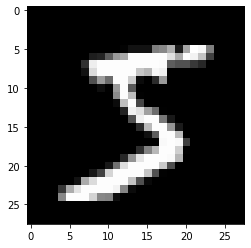

In [8]:
image,label=dataset[0]
plt.imshow(image,cmap='gray')
print("Label : ",label)

Label :  3


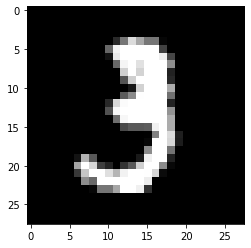

In [9]:
image,label=dataset[10]
plt.imshow(image,cmap='gray')
print("Label : ",label)

In [10]:
import torchvision.transforms as transforms

In [11]:
dataset=MNIST(root='/content/',train=True,transform=transforms.ToTensor())

In [12]:
img_tensor,label=dataset[0]
print(img_tensor.shape,label)
#1-no. of channels
#28,28 indicates pixels(height and length)

torch.Size([1, 28, 28]) 5


In [13]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


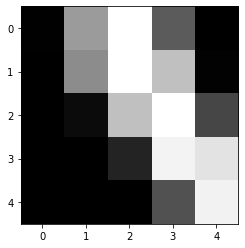

In [14]:
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray');

In [15]:
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
train_ds,val_ds=random_split(dataset,[50000,10000])

In [16]:
batch_size=100
train_loader=DataLoader(train_ds,batch_size,shuffle=True)
val_loader=DataLoader(val_ds,batch_size)

Model Building

In [17]:
import torch.nn as nn
import torch.nn.functional as F

In [18]:
input_size=28*28
output_size=10
model=nn.Linear(input_size,output_size)

In [19]:
print(model.weight.shape)

torch.Size([10, 784])


In [20]:
model.weight

Parameter containing:
tensor([[ 0.0091,  0.0223, -0.0345,  ...,  0.0185, -0.0344, -0.0279],
        [ 0.0129,  0.0002, -0.0185,  ...,  0.0270,  0.0216,  0.0196],
        [-0.0282,  0.0165, -0.0349,  ...,  0.0339, -0.0226, -0.0224],
        ...,
        [ 0.0110,  0.0032, -0.0001,  ..., -0.0316, -0.0315,  0.0306],
        [-0.0197,  0.0152, -0.0036,  ...,  0.0064, -0.0210, -0.0171],
        [ 0.0182, -0.0234,  0.0227,  ...,  0.0107,  0.0195, -0.0154]],
       requires_grad=True)

In [21]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0069,  0.0088,  0.0084,  0.0342,  0.0352,  0.0087,  0.0245, -0.0023,
        -0.0261,  0.0054], requires_grad=True)

In [22]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [23]:
print(model.linear.weight.shape,model.linear.bias.shape)

torch.Size([10, 784]) torch.Size([10])


In [24]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0182, -0.0049, -0.0124,  ...,  0.0188,  0.0099,  0.0249],
         [-0.0319,  0.0275,  0.0207,  ...,  0.0345,  0.0204, -0.0018],
         [ 0.0032, -0.0308,  0.0245,  ...,  0.0087, -0.0180,  0.0118],
         ...,
         [ 0.0251, -0.0099,  0.0232,  ..., -0.0102,  0.0190, -0.0219],
         [-0.0084,  0.0203, -0.0226,  ...,  0.0032, -0.0120, -0.0131],
         [-0.0011,  0.0043, -0.0007,  ...,  0.0120, -0.0004,  0.0057]],
        requires_grad=True), Parameter containing:
 tensor([-0.0005,  0.0297,  0.0271,  0.0300,  0.0345, -0.0346, -0.0058,  0.0054,
          0.0189,  0.0184], requires_grad=True)]

In [25]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([100, 10])
Sample outputs :
 tensor([[ 0.2242, -0.4720,  0.1859,  0.1837, -0.3788,  0.0455,  0.0915,  0.1818,
          0.3610, -0.1463],
        [-0.0630,  0.0689, -0.2439,  0.1222, -0.0081,  0.1825,  0.0269,  0.2595,
          0.0791,  0.0452]])


In [26]:
probs = F.softmax(outputs,dim=1)
print("Sample Probabilities : ",probs[:2].data)
print("Sum : ",torch.sum(probs[0]).item())


Sample Probabilities :  tensor([[0.1180, 0.0588, 0.1135, 0.1133, 0.0646, 0.0987, 0.1033, 0.1131, 0.1353,
         0.0815],
        [0.0888, 0.1014, 0.0741, 0.1069, 0.0939, 0.1136, 0.0972, 0.1227, 0.1024,
         0.0990]])
Sum :  1.0


In [27]:
max_probs,preds=torch.max(probs,dim=1)
print(max_probs)
print(preds)

tensor([0.1353, 0.1227, 0.1246, 0.1431, 0.1184, 0.1360, 0.1473, 0.1260, 0.1456,
        0.1176, 0.1186, 0.1301, 0.1369, 0.1378, 0.1312, 0.1382, 0.1258, 0.1361,
        0.1394, 0.1312, 0.1266, 0.1236, 0.1385, 0.1679, 0.1227, 0.1250, 0.1330,
        0.1689, 0.1251, 0.1358, 0.1680, 0.1360, 0.1424, 0.1587, 0.1273, 0.1361,
        0.1390, 0.1186, 0.1361, 0.1292, 0.1484, 0.1238, 0.1350, 0.1333, 0.1350,
        0.1130, 0.1221, 0.1173, 0.1170, 0.1284, 0.1338, 0.1219, 0.1313, 0.1318,
        0.1451, 0.1310, 0.1208, 0.1256, 0.1754, 0.1538, 0.1328, 0.1431, 0.1318,
        0.1142, 0.1465, 0.1224, 0.1247, 0.1258, 0.1354, 0.1228, 0.1390, 0.1642,
        0.1268, 0.1418, 0.1350, 0.1307, 0.1346, 0.1385, 0.1283, 0.1184, 0.1307,
        0.1388, 0.1575, 0.1269, 0.1302, 0.1286, 0.1315, 0.1417, 0.1244, 0.1544,
        0.1646, 0.1257, 0.1228, 0.1150, 0.1580, 0.1422, 0.1325, 0.1373, 0.1210,
        0.1514], grad_fn=<MaxBackward0>)
tensor([8, 7, 4, 2, 7, 4, 8, 8, 7, 8, 8, 8, 2, 2, 5, 8, 3, 8, 5, 7, 8, 3, 8, 8,

In [28]:
print(labels)

tensor([5, 7, 5, 8, 7, 6, 3, 8, 4, 5, 3, 3, 2, 0, 8, 7, 0, 5, 0, 8, 8, 7, 9, 7,
        4, 3, 7, 7, 1, 1, 4, 9, 6, 3, 0, 6, 9, 4, 2, 2, 6, 6, 2, 4, 2, 5, 8, 5,
        7, 9, 0, 3, 2, 8, 7, 6, 3, 4, 3, 3, 2, 7, 8, 1, 0, 0, 8, 8, 3, 8, 0, 9,
        6, 3, 6, 4, 9, 8, 2, 1, 2, 0, 7, 5, 3, 3, 3, 0, 4, 2, 9, 0, 0, 4, 8, 5,
        0, 8, 3, 6])


Evalutation Metrics And Loss Function

In [29]:
def accuracy(outputs,labels):
  _,preds=torch.max(outputs,dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [30]:
accuracy(outputs,labels)

tensor(0.1000)

In [31]:
loss_fn=F.cross_entropy
loss=loss_fn(outputs,labels)

In [32]:
print(loss)

tensor(2.3097, grad_fn=<NllLossBackward>)


Training Model

In [33]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(input_size,output_size)

  def forward(self,xb):
    xb=xb.reshape(-1,784)
    out=self.linear(xb)
    return out

  def training_step(self,batch):
    images,labels=batch
    out=self(images)
    loss=F.cross_entropy(out,labels)
    return loss

  def validation_step(self,batch):
    images,labels=batch
    out=self(images)
    val_loss=F.cross_entropy(out,labels)
    val_acc=accuracy(out,labels)
    return {"val_loss": val_loss,"val_acc":val_acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

  def epoch_end(self, epoch, result):
    if (epoch+1) % 10 == 0 :
      print("Epoch [{}],train_loss:{:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(epoch+1,result['train_loss'], result['val_loss'], result['val_acc']))


model=MnistModel()

In [34]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        train_loss=[]
        for batch in train_loader:
            loss = model.training_step(batch)
            train_loss.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_loss).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [35]:
# 1st iteration
result=evaluate(model,val_loader)
result

{'val_acc': 0.044700004160404205, 'val_loss': 2.3480148315429688}

In [36]:
history=fit(50,0.001,model,train_loader,val_loader)

Epoch [10],train_loss:0.8238, val_loss: 0.8073, val_acc: 0.8375
Epoch [20],train_loss:0.6180, val_loss: 0.6156, val_acc: 0.8589
Epoch [30],train_loss:0.5372, val_loss: 0.5384, val_acc: 0.8693
Epoch [40],train_loss:0.4921, val_loss: 0.4950, val_acc: 0.8762
Epoch [50],train_loss:0.4626, val_loss: 0.4665, val_acc: 0.8807


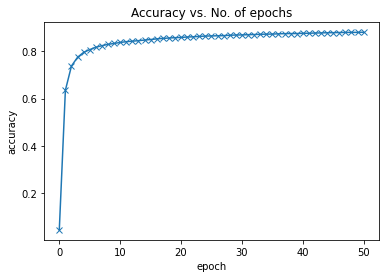

In [37]:
history = [result] + history
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

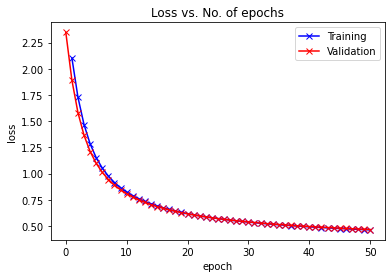

In [38]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');
plot_losses(history)

Testing With individuals images

Labels : 7


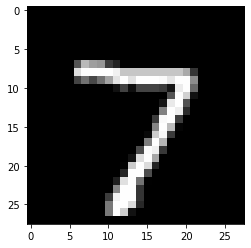

In [39]:
images,labels=test[0]
plt.imshow(images,cmap='gray')
print("Labels :",labels)

In [40]:
test=MNIST(root='/content/',train=False,transform=transforms.ToTensor())

In [41]:
img_tensor,labels=test[0]
print("Image shape",img_tensor.shape)
print("Label : ",labels)

Image shape torch.Size([1, 28, 28])
Label :  7


In [42]:
img_tensor.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [43]:
def predict_image(img_tensor, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


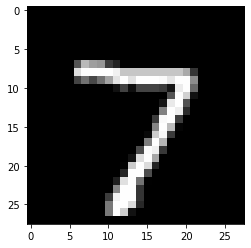

In [44]:
img, label = test[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


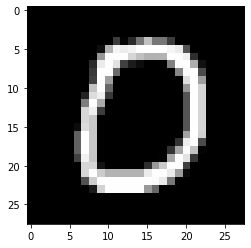

In [45]:
img, label = test[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 3


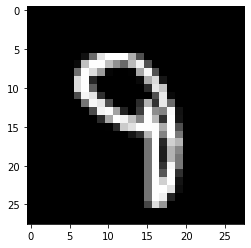

In [46]:
img, label = test[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


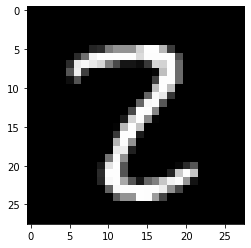

In [47]:
img, label = test[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [48]:
test_loader = DataLoader(test, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_acc': 0.889453113079071, 'val_loss': 0.4365774691104889}

In [49]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [50]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0065,  0.0085,  0.0318,  ..., -0.0224,  0.0203, -0.0139],
                      [-0.0099,  0.0245, -0.0086,  ..., -0.0129, -0.0007, -0.0213],
                      [-0.0223,  0.0110,  0.0106,  ...,  0.0306,  0.0107,  0.0350],
                      ...,
                      [ 0.0354, -0.0329,  0.0040,  ..., -0.0167, -0.0310, -0.0101],
                      [-0.0048,  0.0307,  0.0013,  ...,  0.0254,  0.0221, -0.0044],
                      [ 0.0304,  0.0090,  0.0320,  ...,  0.0162,  0.0002,  0.0223]])),
             ('linear.bias',
              tensor([-0.0935,  0.1427, -0.0550, -0.0358,  0.0404,  0.1583,  0.0058,  0.1264,
                      -0.1968,  0.0004]))])

In [51]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0065,  0.0085,  0.0318,  ..., -0.0224,  0.0203, -0.0139],
                      [-0.0099,  0.0245, -0.0086,  ..., -0.0129, -0.0007, -0.0213],
                      [-0.0223,  0.0110,  0.0106,  ...,  0.0306,  0.0107,  0.0350],
                      ...,
                      [ 0.0354, -0.0329,  0.0040,  ..., -0.0167, -0.0310, -0.0101],
                      [-0.0048,  0.0307,  0.0013,  ...,  0.0254,  0.0221, -0.0044],
                      [ 0.0304,  0.0090,  0.0320,  ...,  0.0162,  0.0002,  0.0223]])),
             ('linear.bias',
              tensor([-0.0935,  0.1427, -0.0550, -0.0358,  0.0404,  0.1583,  0.0058,  0.1264,
                      -0.1968,  0.0004]))])

In [52]:
# Retaining the save .pth file and cross checking 
test_loader = DataLoader(test, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_acc': 0.889453113079071, 'val_loss': 0.4365774691104889}

By logistic Regression we got accuarcy of 88% if num_epoch increases will leads to achieve 90 % may be!! ;)

Increasing Neural Networks for improving accuracy ( Deep Neural Network)

In [53]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/
    Split: Train
    StandardTransform
Transform: ToTensor()

Label :  5


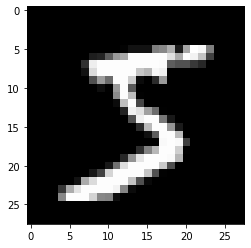

In [54]:
images,labels=dataset[0]
plt.imshow(images[0],cmap='gray')
print("Label : ",labels)

In [55]:
def split_indices(n,val_pct):
  n_val=int(n*val_pct)
  idx=np.random.permutation(n)
  return idx[n_val:],idx[:n_val]

In [56]:
train_idx,val_idx=split_indices(len(dataset),val_pct=0.2)
print(len(train_idx),len(val_idx))
print("Sample Indices : ",val_idx[:20])

48000 12000
Sample Indices :  [50998 25767 58467  8351  3219 59907 40349  2734 41674 18396 21041  9519
  4952 37685 23312  1828 37687  2251 30049 51092]


Label :  1


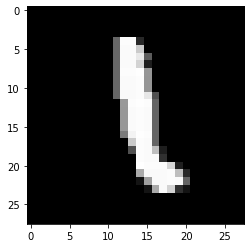

In [57]:
images,labels=dataset[248]
plt.imshow(images[0],cmap='gray')
print("Label : ",labels)

In [58]:
from torch.utils.data.sampler import SubsetRandomSampler as sam

In [59]:
batch_size=100
train_sampler=sam(train_idx)
train_loader=DataLoader(dataset,
                        batch_size,
                        sampler=train_sampler)
val_sampler=sam(val_idx)
val_loader=DataLoader(dataset,
                      batch_size,
                      sampler=val_sampler)

Training Deep Neural Network

In [142]:
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torchvision.transforms import ToTensor

In [143]:
batch_size=128
train_loader=DataLoader(train_ds,batch_size,shuffle=True,num_workers=4,pin_memory=True)
val_loader=DataLoader(val_ds,batch_size,shuffle=True,num_workers=4,pin_memory=True)

Images.Shape :  torch.Size([128, 1, 28, 28])


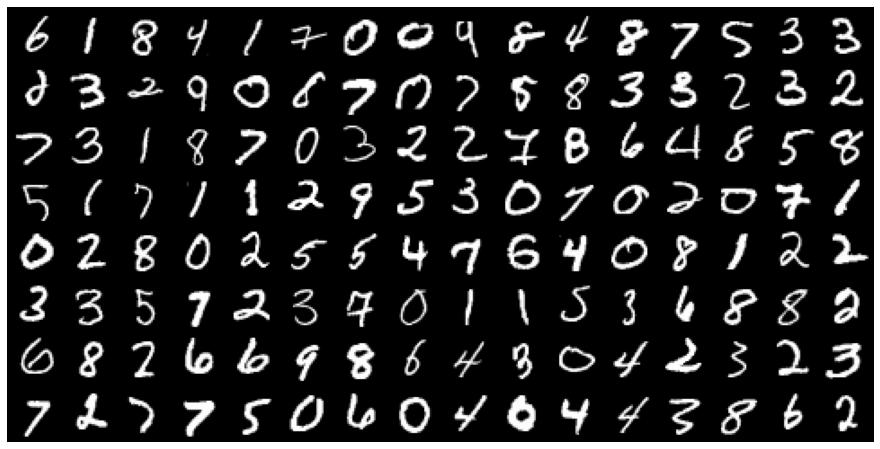

In [144]:
for images,_ in train_loader:
  print("Images.Shape : ",images.shape)
  plt.figure(figsize=(16,8))
  plt.axis("off")
  plt.imshow(make_grid(images,nrow=16).permute((1,2,0)))
  break

In [145]:
def accuracy(outputs,labels):
  _,preds=torch.max(outputs,dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [146]:
class MnistModel(nn.Module):
    """Feedfoward neural network with 1 hidden layer"""
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        self.linear1 = nn.Linear(in_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3=nn.Linear(hidden_size,hidden_size)
        self.linear4=nn.Linear(hidden_size,out_size)
        
    def forward(self, xb):
        xb = xb.reshape(-1,784)
        out = self.linear1(xb)
        out = F.relu(out)
        out = self.linear2(out)
        out =  F.relu(out)
        out = self.linear3(out)
        out = F.relu(out)
        out = self.linear4(out)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
      if(epoch+1)%10==0:
        print("Epoch [{}], val_acc: {:.4f}, val_loss: {:.4f}".format(epoch+1, result['val_acc'], result['val_loss']))


In [147]:
input_size=784
batch_size=32
num_classes=10

In [148]:
model = MnistModel(input_size, hidden_size=32, out_size=num_classes)

In [149]:
for t in model.parameters():
  print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([32, 32])
torch.Size([32])
torch.Size([32, 32])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [150]:
for images, labels in train_loader:
  outputs = model(images)
  loss = F.cross_entropy(outputs, labels)
  print('Loss:', loss.item())
  break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

Loss: 2.308627128601074
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.1136,  0.0210, -0.1105,  0.0046, -0.1467, -0.1253,  0.0822, -0.2079,
         -0.0174,  0.0584],
        [ 0.1097,  0.0134, -0.1163, -0.0020, -0.1430, -0.1201,  0.0890, -0.2093,
         -0.0202,  0.0672]])


In [151]:

torch.cuda.is_available()

True

In [152]:
def get_default_device():
  if torch.cuda.is_available():
    return torch.device("cuda")
  else:
    return torch.device("cpu")

In [153]:
device=get_default_device()
device

device(type='cuda')

In [154]:
def to_device(data,device):
  if isinstance(data,(list,tuple)):
    return [to_device(x,device) for x in data]
  return data.to(device,non_blocking=True)


In [155]:
for images,labels in train_loader:
  print("Images.Shape :",images.shape)
  images=to_device(images,device)
  print(images.device)
  break

Images.Shape : torch.Size([128, 1, 28, 28])
cuda:0


In [156]:
class DeviceDataLoader():
  def __init__(self,dl,device):
    self.dl=dl
    self.device=device

  def __iter__(self):
    for b in self.dl:
      yield to_device(b,self.device)

  def __len__(self):
    return len(self.dl)

In [157]:
train_loader=DeviceDataLoader(train_loader,device)
val_loader=DeviceDataLoader(val_loader,device)

In [158]:
for xb,yb in val_loader:
  print("xb.device : ",xb.device)
  print("yb :",yb)
  break

xb.device :  cuda:0
yb : tensor([9, 1, 5, 2, 3, 2, 8, 7, 5, 2, 4, 4, 1, 0, 1, 3, 0, 3, 1, 4, 4, 0, 2, 3,
        6, 6, 3, 3, 7, 8, 4, 0, 8, 4, 7, 3, 7, 0, 0, 2, 2, 1, 4, 2, 2, 6, 0, 8,
        8, 5, 4, 7, 9, 8, 1, 3, 0, 9, 9, 9, 2, 0, 4, 0, 7, 5, 0, 1, 7, 6, 1, 4,
        7, 8, 9, 0, 7, 4, 8, 9, 1, 3, 8, 5, 7, 7, 9, 7, 7, 4, 3, 9, 1, 7, 6, 8,
        7, 4, 8, 1, 9, 8, 7, 3, 3, 5, 4, 8, 1, 6, 3, 0, 9, 0, 3, 2, 5, 4, 5, 0,
        5, 6, 7, 2, 2, 4, 1, 3], device='cuda:0')


Traning the Model

In [159]:
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

In [160]:
def fit(epochs,lr,model,train_loader,val_loader,opt_func=torch.optim.SGD):
  history=[]
  optimizer=opt_func(model.parameters(),lr)
  for epoch in range(epochs):
    for batch in train_loader:
      loss=model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    result=evaluate(model, val_loader)
    model.epoch_end(epoch,result)
    history.append(result)
  return history

In [161]:
model=MnistModel(input_size, hidden_size=32, out_size=num_classes)
to_device(model,device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=32, bias=True)
  (linear3): Linear(in_features=32, out_features=32, bias=True)
  (linear4): Linear(in_features=32, out_features=10, bias=True)
)

In [162]:
history1=[evaluate(model,val_loader)]
history1

[{'val_acc': 0.0859375, 'val_loss': 2.309114456176758}]

In [166]:
history1+= fit(50, 0.5, model, train_loader, val_loader)

Epoch [10], val_acc: 0.9634, val_loss: 0.1588
Epoch [20], val_acc: 0.9564, val_loss: 0.2388
Epoch [30], val_acc: 0.9604, val_loss: 0.2249
Epoch [40], val_acc: 0.9559, val_loss: 0.2955
Epoch [50], val_acc: 0.9573, val_loss: 0.2585


Text(0.5, 1.0, 'Loss vs #of Epoch')

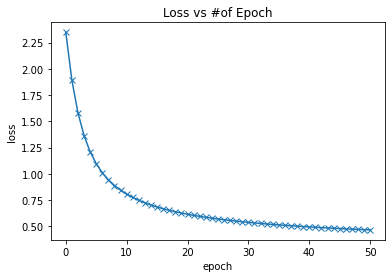

In [167]:
losses=[x['val_loss'] for x in history]
plt.plot(losses,'-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs #of Epoch')

Text(0.5, 1.0, 'accuracy vs #of Epoch')

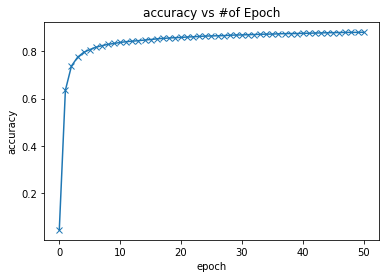

In [168]:
accuracies=[x['val_acc'] for x in history]
plt.plot(accuracies,'-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy vs #of Epoch')

Damnnn!! By increasing #of hidden layer got 95% accuracy
three hidden layers and 1 output layer